# Pham Thanh Dat - 20521175

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('Data-Gold.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)
df_VND = df['VND'].values.reshape(-1, 1)

df

,VND
Date,
2012-01-02,32202288.50
2012-01-03,33607538.00
2012-01-04,33923003.00
2012-01-05,33628569.00
2012-01-06,34000652.75
...,...
2022-12-26,41586906.00
2022-12-27,41894838.00
2022-12-28,41727084.00


# Vẽ đồ thị

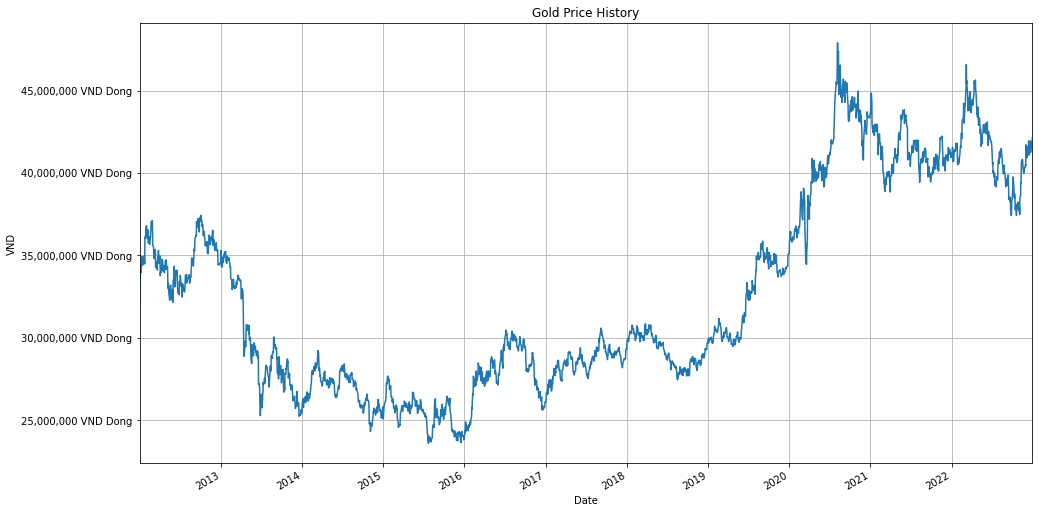

In [3]:
formatter = ticker.StrMethodFormatter('{x:,.0f} VND Dong')

title = 'Gold Price History'
ylabel = 'VND'
xlabel = 'Date'

ax = df['VND'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

In [4]:
gold_price=df['VND']
values=gold_price.values
Train_len=math.ceil(len(values)*0.9)
Train_len

2583

### Trực chuẩn hoá dữ liệu

In [5]:
sc=MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(df)
scaled_data

array([[0.35425019],
       [0.4120421 ],
       [0.42501583],
       ...,
       [0.74596438],
       [0.75560409],
       [0.76288112]])

### Create Training & Testing Data

In [6]:
train_data=scaled_data[0:Train_len,:]

train_x=[]
train_y=[]

for i in range(365, len(train_data)):  # 1 years
  train_x.append(train_data[i-365:i,0])
  train_y.append(train_data[i,0])

train_x,train_y=np.array(train_x), np.array(train_y)

train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))


### Xây dựng model

In [7]:
# define model
model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(train_x.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# compile model
model.compile(loss='mse', optimizer='adam')
# fit model
m=model.fit(train_x, train_y,batch_size= 32, epochs=50)

Epoch 1/50
70/70 [==============================] - 52s 607ms/step - loss: 0.0070
Epoch 2/50
70/70 [==============================] - 37s 529ms/step - loss: 6.7331e-04
Epoch 3/50
70/70 [==============================] - 39s 555ms/step - loss: 6.3290e-04
Epoch 4/50
70/70 [==============================] - 37s 528ms/step - loss: 6.0813e-04
Epoch 5/50
70/70 [==============================] - 37s 528ms/step - loss: 6.5449e-04
Epoch 6/50
70/70 [==============================] - 37s 529ms/step - loss: 5.4968e-04
Epoch 7/50
70/70 [==============================] - 37s 528ms/step - loss: 5.2144e-04
Epoch 8/50
70/70 [==============================] - 37s 526ms/step - loss: 5.0745e-04
Epoch 9/50
70/70 [==============================] - 37s 527ms/step - loss: 4.4266e-04
Epoch 10/50
70/70 [==============================] - 37s 524ms/step - loss: 4.2523e-04
Epoch 11/50
70/70 [==============================] - 37s 528ms/step - loss: 3.9064e-04
Epoch 12/50
70/70 [==============================] - 37s

In [8]:
model.save("GoldPrice_lstm_9_1.h5")

In [9]:
# Create the testing data
test_data=scaled_data[Train_len-365:,:]
test_x=[]
test_y=df[Train_len:]
for i in range (365, len(test_data)):
  test_x.append(test_data[i-365:i,0])
test_x=np.array(test_x)
test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

In [10]:
Predictions= model.predict(test_x)
Predictions=sc.inverse_transform(Predictions)

9/9 [==============================] - 2s 160ms/step


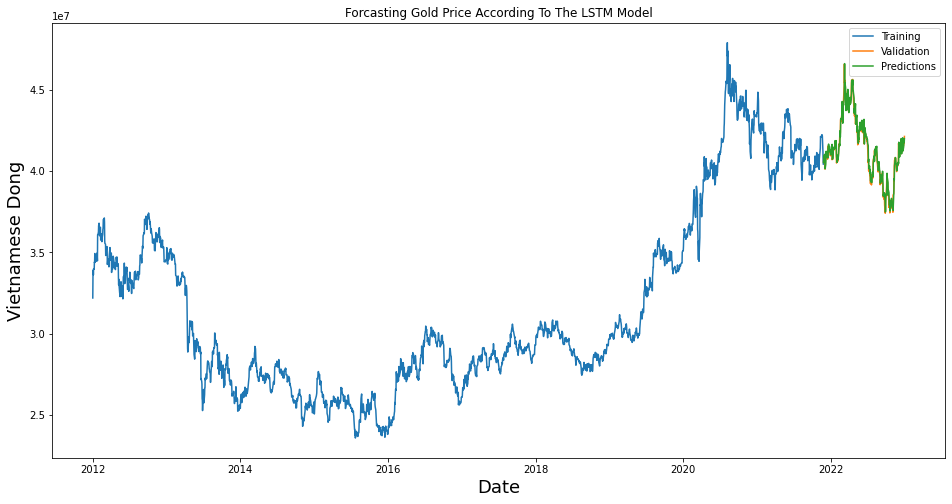

In [11]:
#plot data
train=df[:Train_len]
validation=df[Train_len:]
validation['Predictions']= Predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Forcasting Gold Price According To The LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Vietnamese Dong',fontsize=18)
plt.plot(train['VND'])
plt.plot(validation[['VND','Predictions']])
plt.legend(['Training','Validation','Predictions'])
plt.show()

In [12]:
validation

,VND,Predictions
Date,,
2021-11-25,40546299.04,40529284.0
2021-11-26,40840344.31,40706468.0
2021-11-29,40523204.39,41015164.0
2021-11-30,40948149.18,40641236.0
2021-12-01,40642813.75,41039404.0
...,...,...
2022-12-26,41586906.00,41475464.0
2022-12-27,41894838.00,41655672.0
2022-12-28,41727084.00,41983032.0


In [13]:
data=validation['VND']

In [14]:
data

Date
2021-11-25    40546299.04
2021-11-26    40840344.31
2021-11-29    40523204.39
2021-11-30    40948149.18
2021-12-01    40642813.75
                 ...     
2022-12-26    41586906.00
2022-12-27    41894838.00
2022-12-28    41727084.00
2022-12-29    41961480.00
2022-12-30    42138426.00
Name: VND, Length: 287, dtype: float64

In [15]:
mae = mean_absolute_error(data, Predictions)
mape = mean_absolute_percentage_error(data, Predictions)
mse = mean_squared_error(data, Predictions)
rmse = np.sqrt(mse)
r2 = r2_score(data, Predictions)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")

MAPE: 0.72%
RMSE: 402567


In [31]:
Last_half_year=df[-548:].values
Last_half_year_scaled=sc.transform(Last_half_year)
x_test=[]
x_test.append(Last_half_year_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1, 548, 1)

In [32]:
model.reset_states()
pred_price=model.predict(x_test)
pred_price=sc.inverse_transform(pred_price)
print(pred_price) #2022-08-05

1/1 [==============================] - 2s 2s/step
[[42189788.]]


In [33]:
len(test_data)

652

In [34]:
#Getting the last 100 days records
future=test_data[552:]

In [35]:
future=future.reshape(1,-1)
temp=list(future)
future.shape

(1, 100)

In [36]:
#Creating list of the last 600 data
temp=temp[0].tolist()

In [37]:
#Predicting next 30 days price uisng the current data
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp)>100):
        future = np.array(temp[1:])
        future=future.reshape(1,-1)
        future = future.reshape((1, n_steps, 1))
        yhat = model.predict(future, verbose=0)
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        future = future.reshape((1, n_steps,1))
        yhat = model.predict(future, verbose=0)
        temp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[[0.7649933695793152], [0.7665778398513794], [0.7677404880523682], [0.7689219117164612], [0.7703548073768616], [0.7720748782157898], [0.774005115032196], [0.7760327458381653], [0.7780593633651733], [0.7800226807594299], [0.7818977236747742], [0.7836875319480896], [0.7854095697402954], [0.787085235118866], [0.7887331247329712], [0.7903659343719482], [0.7919901013374329], [0.7936081886291504], [0.7952201962471008], [0.7968249917030334], [0.7984216809272766], [0.8000096082687378], [0.801588773727417], [0.8031588196754456], [0.804719865322113], [0.8062721490859985], [0.8078152537345886], [0.8093487024307251], [0.8108720779418945], [0.8123847842216492]]


In [38]:
tam=sc.inverse_transform(lst_output)
print(tam)

[[42189786.73333822]
 [42228314.19926381]
 [42256584.7763373 ]
 [42285311.89149027]
 [42320153.71825366]
 [42361978.40364209]
 [42408913.41686612]
 [42458216.63079445]
 [42507495.20615976]
 [42555234.596     ]
 [42600827.53220311]
 [42644347.93045815]
 [42686220.44364539]
 [42726965.38024269]
 [42767034.93034783]
 [42806737.80066215]
 [42846230.51852719]
 [42885575.40501413]
 [42924772.46012294]
 [42963794.14663615]
 [43002618.7246452 ]
 [43041230.25155051]
 [43079628.72735206]
 [43117805.45608644]
 [43155763.33640812]
 [43193508.16562605]
 [43231029.79844958]
 [43268316.64026079]
 [43305358.54576907]
 [43342141.02170201]]


In [39]:
len(tam)

30

In [40]:
len(scaled_data)

2870

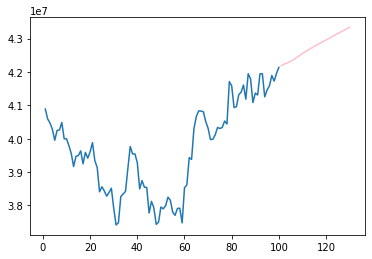

In [41]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, sc.inverse_transform(scaled_data[2770:]))
plt.plot(plot_pred, sc.inverse_transform(lst_output),c='pink')

In [42]:
dataset_new=scaled_data.tolist()

In [43]:
len(dataset_new)

2870

In [44]:
#Entends helps us to fill the missing value with approx value
dataset_new.extend(lst_output)

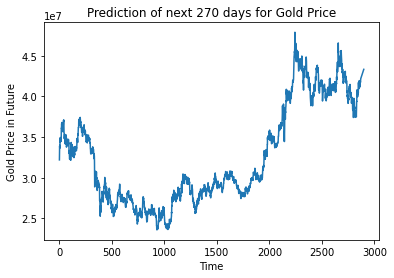

In [45]:
final=sc.inverse_transform(dataset_new).tolist()

plt.ylabel("Gold Price in Future")
plt.xlabel("Time")
plt.title("Prediction of next 270 days for Gold Price")
plt.plot(final,)
plt.show()